In [ ]:
pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     |████████████████▎               | 834.1 MB 1.2 MB/s eta 0:10:51tcmalloc: large alloc 1147494400 bytes == 0x655fa000 @  0x7fe552a22615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████▋           | 1055.7 MB 59.1 MB/s eta 0:00:10tcmalloc: large alloc 1434370048 bytes == 0x2e22000 @  0x7fe552a22615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |██████████████████████████▏     | 

In [ ]:
import scipy
import torch
import matplotlib.pyplot as plt

In [ ]:
# To check Pytorch version
print(torch.__version__)

1.11.0+cu113


In [ ]:
# To check GPU availability
# assert torch.cuda.is_available()

In [ ]:
# To install Falkon library
!pip install git+https://github.com/falkonml/falkon.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/falkonml/falkon.git to /tmp/pip-req-build-6zipiuq6
  Running command git clone -q https://github.com/falkonml/falkon.git /tmp/pip-req-build-6zipiuq6
  Cloning https://github.com/getkeops/keops (to revision ad044a671fdc3c2790b0321f6b9f9b5aa3d220df) to /tmp/pip-install-evxlpkz_/keopscore_39bce2b3b37643ddbaecb44e62027fc0
  Running command git clone -q https://github.com/getkeops/keops /tmp/pip-install-evxlpkz_/keopscore_39bce2b3b37643ddbaecb44e62027fc0
  Running command git rev-parse -q --verify 'sha^ad044a671fdc3c2790b0321f6b9f9b5aa3d220df'
  Running command git fetch -q https://github.com/getkeops/keops ad044a671fdc3c2790b0321f6b9f9b5aa3d220df
  Running command git checkout -q ad044a671fdc3c2790b0321f6b9f9b5aa3d220df
  Running command git submodule update --init --recursive -q
  Cloning https://github.com/getkeops/keops (to revision ad044a671fdc3c2790b0321f6b9f

In [ ]:
import falkon

In [ ]:
# Drive
from google.colab import drive

# we connect to the drive folder to work with the data stored
drive.mount('/content/drive')

In [ ]:
!cp drive/MyDrive/NPLM/utils.py .

In [ ]:
import numpy as np

from utils import get_logflk_config, run_toys, candidate_sigma, return_best_chi2dof, plot_ref_data

In [ ]:
import utils

In [ ]:
# to estimate flk_sigma from data use candidate_sigma on a reference sample
tune_ref_sample = np.random.default_rng(0).exponential(scale=1/8, size=(10000,1))
candidate_sigma(tune_ref_sample)

# Reference

[--] Toy 0: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2018, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 10.450530440708427
Time = 172.88 sec
	


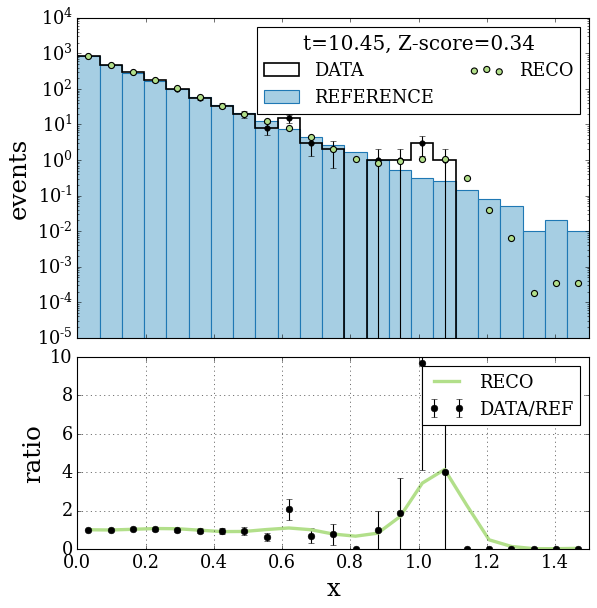

[--] Toy 1: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2001, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 12.331639361489568
Time = 144.61 sec
	
[--] Toy 2: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1968, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 5.995071966560431
Time = 154.22 sec
	
[--] Toy 3: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1926, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 10.502969017060707
Time = 154.3 sec
	
[--] Toy 4: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2094, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 9.623211878319125
Time = 157.05 sec
	
[--] Toy 5: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2043, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 4.134728191544383
Time = 178.25 sec
	
[--] Toy 6: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2005, 1)
Iteration 0 - penalty 1.000000e-10 - sub-iterations 100
t = 6.903074250487139

In [ ]:
N_0=200000 # size of reference sample
N0=2000 # expected background
weight=N0/N_0

M=3000
lam=1e-10
flk_sigma = 0.3

flk_config = get_logflk_config(M,flk_sigma,[lam],weight=weight,iter=[100],seed=None,cpu=True) # seed is set inside learn_t function

# null hypothesis
NS=0 # expected NP component
run_toys("NP0", "./reference/", N_0, N0, NS, flk_config, toys=np.arange(100), plots_freq=299, df=9.6)

# alternative hypothesis with NP1 signal
# NS=10 # expected NP component
# run_toys("NP3", "./NP3/", N_0, N0, NS, flk_config, toys=np.arange(100), plots_freq=20, df=9.6)

In [ ]:
# to find the degree of freedom of the chi2 for the reference experiments, use the function return_best_chi2dof in utils.py

# in utils.py you additional functions can be found to plot the test statistics

# DoF calculation

In [ ]:
tobs = np.loadtxt('t (1).txt',delimiter=',')[:,1]
tobs = [t for t in tobs if t >= 0]  # remove the negative element

In [ ]:
from scipy.stats import norm, chi2, rv_continuous, kstest

dof_range = np.arange(np.nanmedian(tobs) - 10, np.nanmedian(tobs) + 10, 0.1)
dof_range = [df for df in dof_range if df>=0]  # remove the negative grids

ks_tests = []

for dof in dof_range:

    test = kstest(tobs, lambda x:chi2.cdf(x, df=dof))[0]

    ks_tests.append((dof, test))

best = min(ks_tests, key = lambda t: t[1]) # select best dof according to KS test result


In [ ]:
best

(8.469454092074992, 0.043969282791062825)

In [ ]:
best = return_best_chi2dof(np.loadtxt('/content/t (1).txt',delimiter=',')[:,1])
best

(8.445262197868184, 0.0468870281842035)

# NP1

[--] Toy 0: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2020, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 8.950977347424164
Time = 132.42 sec
	


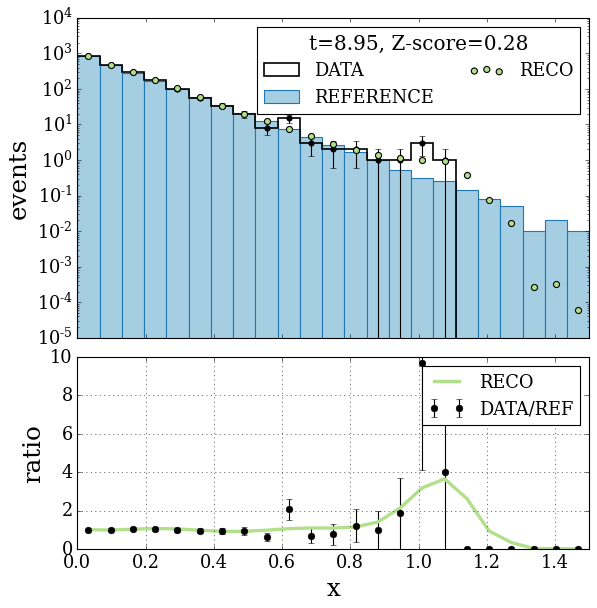

[--] Toy 1: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2009, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 19.400269254575687
Time = 165.55 sec
	
[--] Toy 2: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1981, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 30.8081894882042
Time = 141.37 sec
	
[--] Toy 3: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1939, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 39.28757246837034
Time = 169.1 sec
	
[--] Toy 4: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2115, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 53.66346948449953
Time = 186.07 sec
	
[--] Toy 5: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2053, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 14.196821914210005
Time = 150.55 sec
	
[--] Toy 6: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2014, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 14.287648244644434

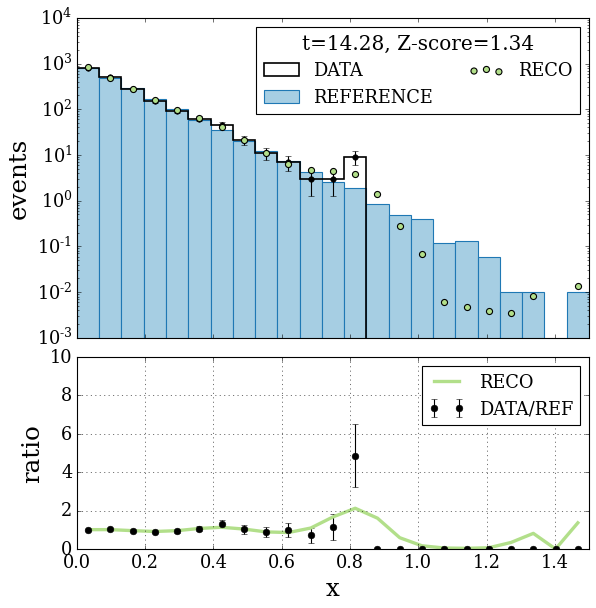

In [ ]:
N_0=200000 # size of reference sample
N0=2000 # expected background
weight=N0/N_0

M=3000
lam=1e-9
flk_sigma = 0.3

flk_config = get_logflk_config(M,flk_sigma,[lam],weight=weight,iter=[100],seed=None,cpu=True) # seed is set inside learn_t function

# null hypothesis
# NS=0 # expected NP component
# run_toys("NP0", "./reference/", N_0, N0, NS, flk_config, toys=np.arange(100), plots_freq=99, df=9.6)

# alternative hypothesis with NP1 signal
NS=10 # expected NP component
run_toys("NP1", "./NP1/", N_0, N0, NS, flk_config, toys=np.arange(50), plots_freq=49, df= best[0])

In [ ]:
# in utils.py you additional functions can be found to plot the test statistics
tobs = np.loadtxt('/content/t (1).txt',delimiter=',')[:,1]
tobs = [t for t in tobs if t >= 0]  # remove the negative element

plot_ref_data(ref=np.array(tobs), data=np.loadtxt('/content/t (3).txt',delimiter=',')[:,1], dof=best[0],
              name='NP1', out_path='./fig', title='T distribution (Reference-vs-NP1)', density=True, bins=10,
              c_ref='#abd9e9', e_ref='#2c7bb6', c_sig='#fdae61', e_sig='#d7191c')

# NP2

[--] Toy 0: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2084, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 21.539636474904057
Time = 144.24 sec
	


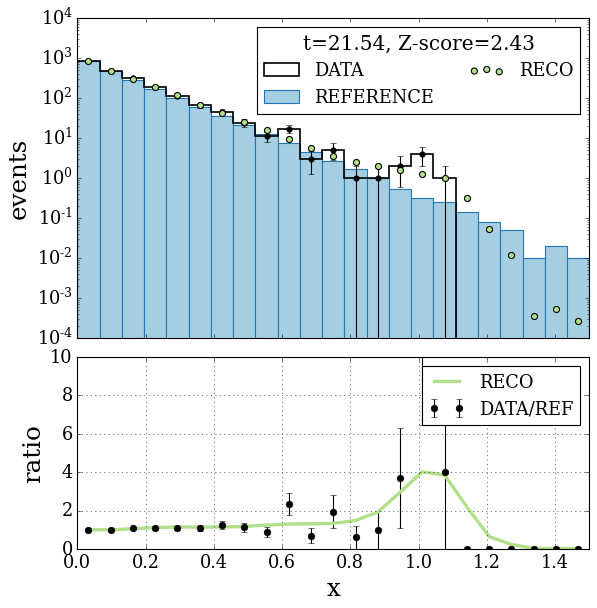

[--] Toy 1: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2086, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 24.01330933774375
Time = 138.58 sec
	
[--] Toy 2: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2068, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 19.28013228523895
Time = 104.48 sec
	
[--] Toy 3: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2025, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 22.418158273608967
Time = 137.82 sec
	
[--] Toy 4: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2218, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 59.041874759202756
Time = 105.72 sec
	
[--] Toy 5: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2133, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 31.036843609023947
Time = 117.62 sec
	
[--] Toy 6: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2091, 1)
Iteration 0 - penalty 1.000000e-09 - sub-iterations 100
t = 24.899992967811

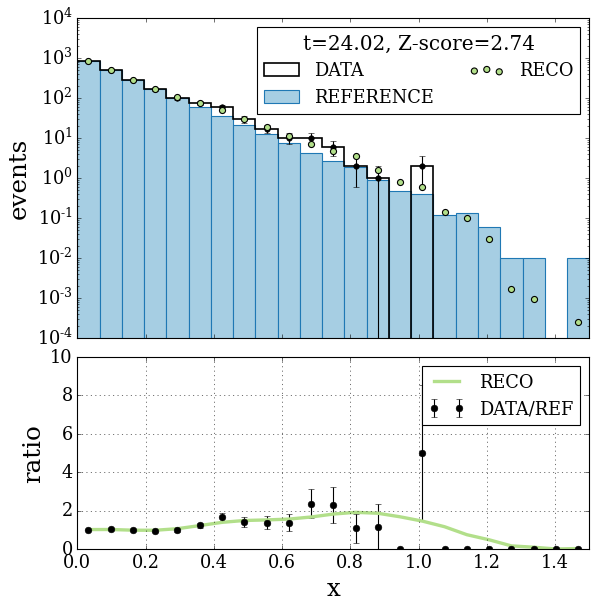

In [ ]:
N_0=200000 # size of reference sample
N0=2000 # expected background
weight=N0/N_0

M=3000
lam=1e-9
flk_sigma = 0.3

flk_config = get_logflk_config(M,flk_sigma,[lam],weight=weight,iter=[100],seed=None,cpu=True) # seed is set inside learn_t function

# null hypothesis
# NS=0 # expected NP component
# run_toys("NP0", "./reference/", N_0, N0, NS, flk_config, toys=np.arange(100), plots_freq=99, df=9.6)

# alternative hypothesis with NP2 signal
NS=90 # expected NP component
run_toys("NP2", "./NP2/", N_0, N0, NS, flk_config, toys=np.arange(50), plots_freq=49, df= best[0])

In [ ]:
# in utils.py you additional functions can be found to plot the test statistics

plot_ref_data(ref=np.array(tobs), data=np.loadtxt('/content/t (4).txt',delimiter=',')[:,1], dof=best[0],
              name='NP2', out_path='./fig', title='T distribution (Reference-vs-NP2)', density=True, bins=10,
              c_ref='#abd9e9', e_ref='#2c7bb6', c_sig='#fdae61', e_sig='#d7191c')

# NP3

In [ ]:
N_0=200000 # size of reference sample
N0=2000 # expected background
weight=N0/N_0

M=3000
lam=1e-9
flk_sigma = 0.3

flk_config = get_logflk_config(M,flk_sigma,[lam],weight=weight,iter=[100],seed=None,cpu=True) # seed is set inside learn_t function

# null hypothesis
# NS=0 # expected NP component
# run_toys("NP0", "./reference/", N_0, N0, NS, flk_config, toys=np.arange(100), plots_freq=99, df=9.6)

# alternative hypothesis with NP3 signal
NS=90 # expected NP component
run_toys("NP3", "./NP3/", N_0, N0, NS, flk_config, toys=np.arange(50), plots_freq=49, df= best[0])

In [ ]:
# in utils.py you additional functions can be found to plot the test statistics

plot_ref_data(ref=np.array(tobs), data=np.loadtxt('/content/t (5).txt',delimiter=',')[:,1], dof=best[0],
              name='NP3', out_path='./fig', title='T distribution (Reference-vs-NP3)', density=True, bins=10,
              c_ref='#abd9e9', e_ref='#2c7bb6', c_sig='#fdae61', e_sig='#d7191c')